<a href="https://colab.research.google.com/github/tutalae/Titanic-machine-learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading Data
titanic = pd.read_csv("https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv", index_col = 'PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean Continuous variables

In [6]:
# Fill missing for age
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace = True)
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S


In [9]:
# Combine SibSp & Parch

<Figure size 432x288 with 0 Axes>

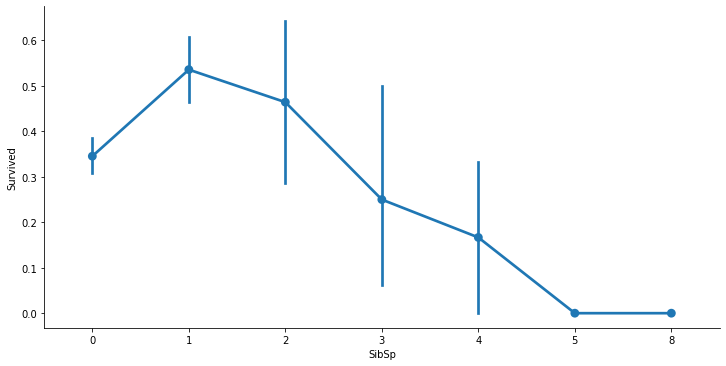

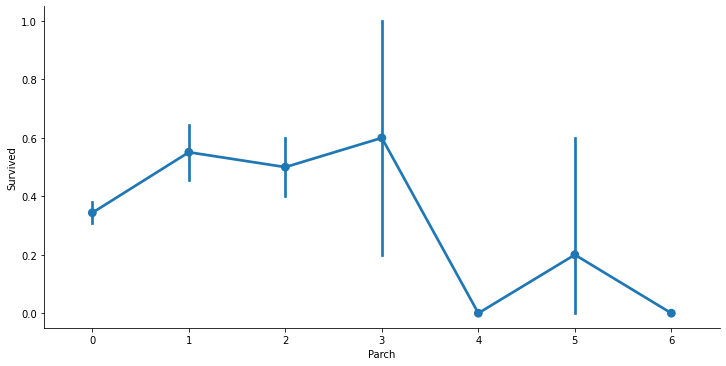

In [13]:
for i, col in enumerate(["SibSp", "Parch"]):
      plt.figure(i)
      sns.catplot(x = col, y = "Survived", data = titanic, kind = "point", aspect = 2, )


In [14]:
titanic["Family_cnt"] = titanic["SibSp"] + titanic["Parch"]

In [15]:
# Drop unnecessary variables

In [24]:
titanic.drop(["SibSp", "Parch"], axis = 1, inplace= True)

In [26]:
titanic.reset_index(drop=True, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [27]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [29]:
titanic.groupby(titanic["Cabin"].isnull())["Survived"].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [31]:
titanic["Cabin_ind"] = np.where(titanic["Cabin"].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [32]:
# convert Sex to numeric

In [33]:
gender_num = {"male": 0 , "female" : 1}
titanic["Sex"] = titanic["Sex"].map(gender_num)
titanic.head()


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [34]:
# Drop unnecessary variables
titanic.drop(["Cabin", "Embarked", "Name", "Ticket"], axis= 1, inplace= True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [35]:
#Write out cleaned data
titanic.to_csv("../../../titanic_cleaned.csv", index = False)

In [36]:
titanic_cleaned = titanic.copy()
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
features = titanic.drop("Survived", axis = 1)
labels = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [42]:
for dataset in [y_train, y_val, y_test]:
  print(round(len(dataset)/len(labels), 2))

0.6
0.2
0.2


In [43]:
# write out data
"""
X_train.to_csv("train_features.csv", index= False)
X_val.to_csv()
X_test.to_csv()

y_train.to_csv()
y_val.to_csv()
y_test.to_csv()
"""

'\nX_train.to_csv("train_features.csv", index= False)\nX_val.to_csv()\nX_test.to_csv()\n\ny_train.to_csv()\ny_val.to_csv()\ny_test.to_csv()\n'

In [1]:
# Regression
from sklearn.linear_model import LogisticRegression

LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [2]:
dir(LogisticRegression)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']